# Ising 1D using QPE

Hamiltonian
$$
H = -\sum_j \sigma^z_j \sigma^z_{j+1}
$$

/home/grufoony/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


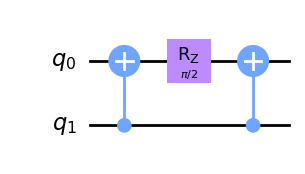

In [106]:
from qiskit import QuantumCircuit
from tqdm.notebook import trange
import numpy as np
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram

t = np.pi / 4

ising_gate = QuantumCircuit(2)
ising_gate.cx(1, 0) # cambio di base
ising_gate.rz(2 * t, 0)
ising_gate.cx(1, 0) # torno alla base originale
U_ising = ising_gate.to_gate(label = 'U_ising').control(1)
ising_gate.draw('mpl')

In [107]:
n_counting = 12
n_used = 2

ising = QuantumCircuit(n_used + n_counting, n_counting)
for qubit in range(n_counting):
    ising.h(qubit)

ising.x(n_counting)
ising.x(n_counting + 1)
# qubit 3 in 0
# ising.draw("mpl")

In [108]:
t = np.pi/4

repetitions = 1
for counting_qubit in trange(n_counting):
    for i in trange(repetitions, leave = False):
        # apply ising gate
        ising.append(U_ising, [counting_qubit] + list(range(n_counting, n_counting + n_used)))
    repetitions *= 2
# ising.draw(output='mpl')

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

In [109]:
def iqft(qCircuit, n):
    '''
    Apply the inverse quantum Fourier transform to the first n qubits in qCircuit
    '''
    for qubit in range(n//2):
        qCircuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qCircuit.cp(-np.pi/float(2**(j-m)), m, j)
        qCircuit.h(j)

In [110]:
ising.barrier()
iqft(ising, n_counting)
ising.barrier()

for n in range(n_counting):
    ising.measure(n,n)

# ising.draw(output='mpl')

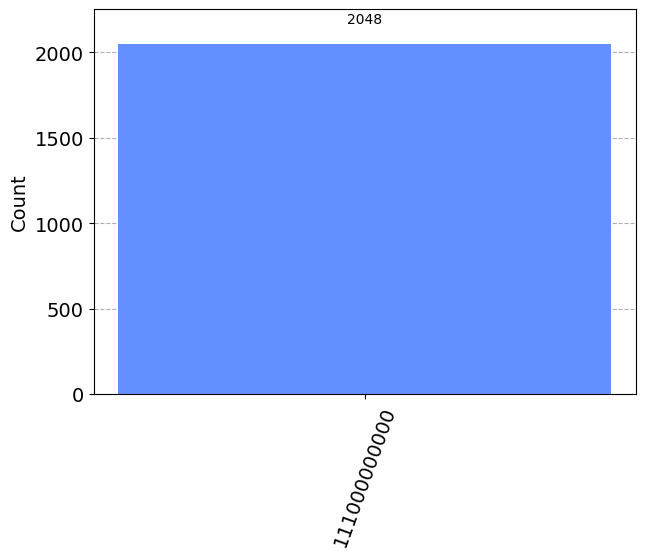

In [111]:
simulator = Aer.get_backend('aer_simulator')
N = 2**11
t_qpe = transpile(ising, simulator)

result = simulator.run(t_qpe, shots=N).result()
plot_histogram(result.get_counts())

In [113]:
# get max count and convert to binary
counts = result.get_counts()
max_count = 0
max_count = max(counts, key=counts.get)
# revert string
# max_count = max_count[::-1]
# convert to decimal
max_count = int(max_count, 2)
# divide by 2^n
max_count /= 2**n_counting
# print result
print(f"The result is {max_count}")

The result is 0.875
